Aaron Vo

The data file winnebago contains monthly unit sales of recreational vehicles (RVs) from Winnebago, Inc., from November 1966 through February 1972.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read winnebago data locally
df = pd.read_csv('winnebago.dat')
df.head()

,winnebago
0,61
1,48
2,53
3,78
4,75


(a) Display and interpret the time series plot for these data.

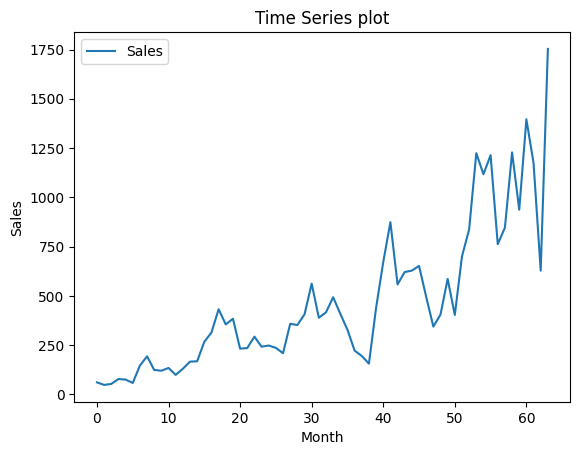

In [2]:
sales = df['winnebago']

plt.plot(sales, label = 'Sales')
plt.title('Time Series plot')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

(b) Now take natural logarithms of the monthly sales figures and display the time series plot of the transformed values. Describe the effect of the logarithms on the behavior of the series.

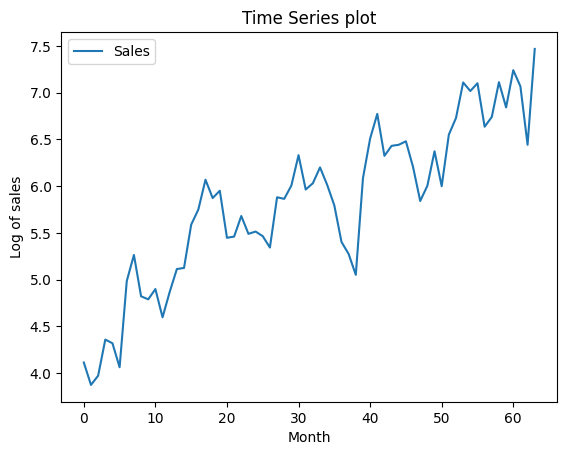

In [3]:
df['log_sales'] = np.log(sales)
plt.plot(df['log_sales'], label = 'Sales')
plt.title('Time Series plot')
plt.xlabel('Month')
plt.ylabel('Log of sales')
plt.legend()
plt.show()

We see that the log of the sales figures is scaled much lower where as the original graph saw the y axis up into the thousands.

(c) Calculate the fractional relative changes, (Y<sub>t</sub> − Y<sub>t−1</sub>)/Y<sub>t−1</sub>, and compare them with the differences of (natural) logarithms,▽log(Yt) = log(Y<sub>t</sub>) − log(Y<sub>t−1</sub>). How do they compare for smaller values and for larger values?

Fractional Relative Changes:
0          NaN
1    -0.245283
2     0.064103
3     0.333333
4    -0.051724
        ...   
59   -0.208453
60    0.390971
61   -0.353503
62   -0.311466
63         NaN
Name: winnebago, Length: 64, dtype: float64


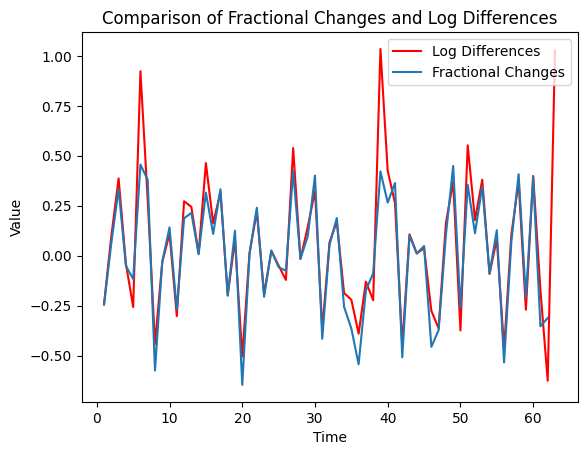

In [5]:
# Get the factional relative change
frac_rel_changes = sales.diff() / sales.shift(-1)
print("Fractional Relative Changes:")
print(frac_rel_changes)

# Get the difference of the natural log
log_diffs = df['log_sales'].diff()

plt.plot(log_diffs, '-r', label='Log Differences')
plt.plot(frac_rel_changes, label='Fractional Changes')
plt.title('Comparison of Fractional Changes and Log Differences')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Here, we see that the log difference plot has a more positive variance for large values. The log differences have a higher spike and is more volitile

7) Consider the annual rainfall data for Los Angeles shown in Exhibit 1.1, on page 2. The quantile-quantile normal plot of these data, shown in Exhibit 3.17, on page 50, convinced us that the data were not normal. The data are in the file larain.

a. Use software to produce a plot similar to Exhibit 5.11, on page 102, and determine the “best” value of λ for a power transformation of the data.

```
data("larain")
> larain.transf=BoxCox.ar(larain)
```

![title](HW4_7a.png)

best value of λ is 0.2.

(b) Display a quantile-quantile plot of the transformed data. Are they more normal?

```
lambda <- larain.transf$mle

powerTransform <- function(y, lambda, method = "boxcox"){
  ((y)^lambda - 1) / lambda
}

model <- lm(powerTransform(larain, lambda)~time(larain))

qqnorm(rstudent(model) , lwd=2, col="blue" )
qqline(rstudent(model), col = "red")

```

![title](HW4_7b.png)

(c) Produce a time series plot of the transformed values.

```
plot(powerTransform(larain, lambda), main = "BoxCox LaRain TS", type='o',
     ylab='BoxCox Rain', lwd=2, col="blue")
```

![title](HW4_7c.png)

(d) Use the transformed values to display a plot of Yt versus Yt−1. Should we expect the transformation to change the dependence or lack of dependence in the series?

![title](HW4_7d.png)

There is no dependence in the between the transformed data points and the normal data points. 